In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [3]:
train_set = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\Kaggle work\Spaceship Titanic\train.csv')
test_set = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\Kaggle work\Spaceship Titanic\test.csv')

In [4]:
train_set.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_set.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
train_set.drop(['Name','PassengerId','Cabin'], axis=1, inplace=True)
test_set.drop(['Name','Cabin'], axis=1, inplace=True)

In [8]:
train_set['VIP'].fillna(train_set['VIP'].mode()[0], inplace=True)
test_set['VIP'].fillna(test_set['VIP'].mode()[0], inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


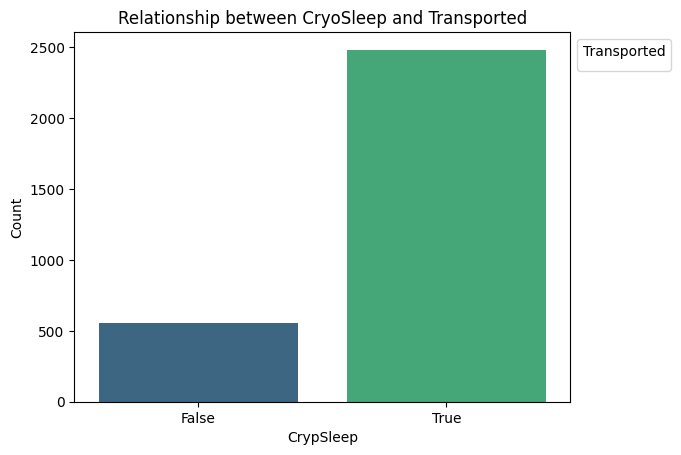

In [9]:
grouped_data = train_set.groupby(['CryoSleep', 'Transported']).size().unstack().fillna(0)

# Plot the grouped bar plot using Seaborn
sns.barplot(data=grouped_data, palette='viridis')
plt.title('Relationship between CryoSleep and Transported')
plt.xlabel('CrypSleep')
plt.ylabel('Count')
plt.legend(title='Transported', bbox_to_anchor=(1, 1))
plt.show()

In [10]:
train_set['CryoSleep'].fillna(train_set['CryoSleep'].mode()[0], inplace=True)
test_set['CryoSleep'].fillna(test_set['CryoSleep'].mode()[0], inplace=True)

In [11]:
train_set['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

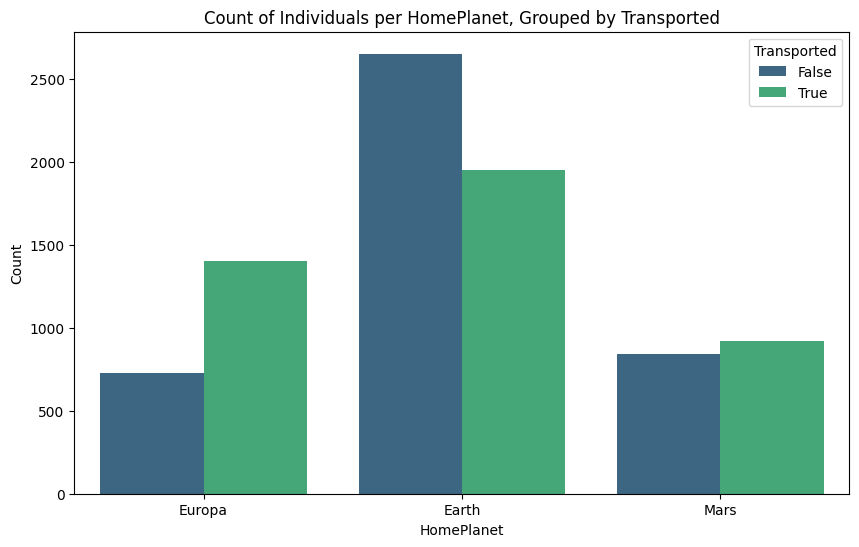

In [12]:

# Assuming you have a DataFrame named train_set with columns 'HomePlanet' and 'Transported'
plt.figure(figsize=(10, 6))
sns.countplot(data=train_set, x='HomePlanet', hue='Transported', palette='viridis')
plt.title('Count of Individuals per HomePlanet, Grouped by Transported')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.legend(title='Transported', bbox_to_anchor=(1, 1))
plt.show()

In [13]:
X = train_set.drop(['Transported'], axis=1)
Y = train_set['Transported']
X_test = test_set.drop(['PassengerId'], axis=1)

In [14]:
num_col = X.select_dtypes(include=['int64','float64']).columns
cat_col = X.select_dtypes(include=['object']).columns
bool_col = X.select_dtypes(include=['bool']).columns
print('numerical_columns : ',num_col)
print('categorical_columns :',cat_col)
print('boolean_columns : ',bool_col)

numerical_columns :  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')
categorical_columns : Index(['HomePlanet', 'Destination'], dtype='object')
boolean_columns :  Index(['CryoSleep', 'VIP'], dtype='object')


In [15]:
num_transformer = Pipeline(steps=[('Imputer', SimpleImputer(strategy='mean')),
                                  ('Scalar', StandardScaler())])
cat_transformer = Pipeline(steps=[('Imputer', SimpleImputer(strategy='most_frequent')),
                                  ('OneHot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_col),
                                               ('cat', cat_transformer, cat_col),
                                               ('bool', OneHotEncoder(), bool_col)], sparse_threshold=0)

In [16]:
preprocessor

ColumnTransformer(sparse_threshold=0,
                  transformers=[('num',
                                 Pipeline(steps=[('Imputer', SimpleImputer()),
                                                 ('Scalar', StandardScaler())]),
                                 Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['HomePlanet', 'Destination'], dtype='object')),
                                ('bool', OneHotEncoder(),
                                 Index(['CryoSleep', 'VIP'], dtype='object'))])

In [17]:
# Splitting data into training and testing sets
X_train, X_cv, y_train, y_cv = train_test_split(X, Y, test_size=0.2, random_state=42)
print('X_train shape : ', X_train.shape)
print('X_cv shape : ', X_cv.shape)
print('y_train shape : ', y_train.shape)
print('y_cv shape : ', y_cv.shape)

X_train shape :  (6954, 10)
X_cv shape :  (1739, 10)
y_train shape :  (6954,)
y_cv shape :  (1739,)


In [32]:
model = RandomForestClassifier(n_estimators=550, max_depth=10)

In [33]:
# Creating a pipeline with preprocessing and model
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',  model)
])

In [27]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer()),
                                                                  ('Scalar',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['HomePlanet', 'Destination'], dtype='object')),
                                                 ('bool', OneHotEncoder(),
                                                  Index(['CryoSleep', 'VIP'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=15, n_estimators=550))])

In [28]:
y_cv_pred = my_pipeline.predict(X_cv)

In [29]:

# Accuracy
accuracy = accuracy_score(y_cv, y_cv_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_cv, y_cv_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_cv, y_cv_pred)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_cv, y_cv_pred)
print("F1-score:", f1)

# Confusion matrix
conf_matrix = confusion_matrix(y_cv, y_cv_pred)
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.7722829212190915
Precision: 0.7654185022026432
Recall: 0.7915717539863326
F1-score: 0.7782754759238523
Confusion matrix:
 [[648 213]
 [183 695]]


In [30]:
y_test_pred = my_pipeline.predict(X_test)
prediction_df = pd.DataFrame({
    'PassengerId': test_set['PassengerId'],
    'Transported': y_test_pred
})
prediction_df.head(4277)


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [31]:
prediction_df.to_csv(r'C:\Users\Hp\OneDrive\Desktop\Kaggle work\Spaceship Titanic\Y_pred.csv', index=False)